In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
link = 'https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
df = pd.read_csv(link)

In [32]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [33]:
dummies_df = pd.get_dummies(df['origin'])

df = df.drop('origin', axis=1)

df = pd.concat([df, dummies_df], axis=1, sort=False)

X = df.drop('mpg', axis=1)
y = df.iloc[:, 0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.97008157, -1.46462995, -1.23806874,  1.85760365, -0.92976554,
        -0.48397751,  2.25585658, -1.35083021],
       [-0.3659125 ,  0.47857446,  0.13156573, -0.69940732,  0.23085295,
        -0.48397751,  2.25585658, -1.35083021],
       [-0.76869188, -0.21015622, -0.71438497, -0.25020269, -0.92976554,
         2.0662117 , -0.44329059, -1.35083021],
       [-0.62222665, -0.52992403, -0.57627057,  0.12989353, -0.92976554,
        -0.48397751, -0.44329059,  0.74028548],
       [-0.75953781, -0.43153394,  0.28118966,  2.16859147, -0.92976554,
        -0.48397751,  2.25585658, -1.35083021],
       [-0.66799704, -0.0871686 ,  0.14307526,  0.02623093, -0.92976554,
        -0.48397751,  2.25585658, -1.35083021],
       [-0.85107857, -0.45613146, -0.40708043,  0.64820657, -0.92976554,
        -0.48397751,  2.25585658, -1.35083021],
       [-1.02500603, -0.87428937, -1.23231397,  1.68483264, -0.92976554,
        -0.48397751, -0.44329059,  0.74028548],
       [-0.76869188, -0.33314384

In [40]:
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test RMSE: {:.2f}'.format(rmse_test))

Test RMSE: 4.04


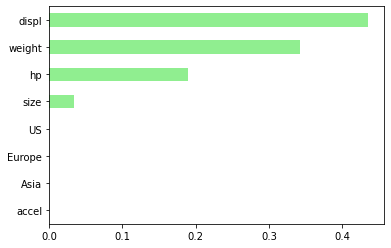

In [41]:
import matplotlib.pyplot as plt
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances_rf = importances_rf.sort_values() 
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [42]:
link = 'https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv'
df = pd.read_csv(link)

In [49]:
df.tail()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
1483,19,0,1,0.80,0.49,0.1343,452,14487,8,1,1,0,0
1484,20,0,1,0.80,0.49,0.1343,356,14488,8,1,1,0,0
1485,21,0,1,0.76,0.58,0.1940,303,14489,8,1,1,0,0
1486,22,0,1,0.76,0.58,0.1940,277,14490,8,1,1,0,0
1487,23,0,1,0.74,0.62,0.1045,174,14491,8,1,1,0,0


In [44]:
y = df[['cnt']]
X = df.drop('cnt', axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
rf = RandomForestRegressor(n_estimators=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test RMSE: {:.2f}'.format(rmse_test))

Test RMSE: 57.51


C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


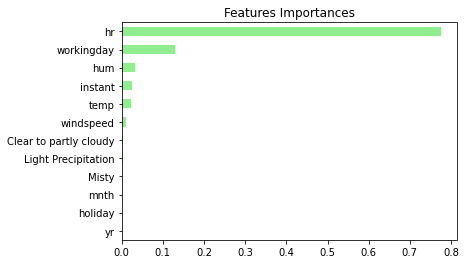

In [59]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()